In [1]:
import urllib.request
import numpy as np
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plot
import pandas as pd

In [12]:
# Lectura de los datos
loc=r"C:\Users\TOSHIBA-PC\Google Drive\winequality-red.csv"
data= pd.read_csv(loc,sep=";",)
names=list(data.columns.values)
label=list(data["quality"])
Xlist=(data.drop("quality",1))
Xlist=[Xlist.iloc[i] for i in range(len(Xlist))]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [12]:
# Normalización de columnas en X y etiquetas
nrows= len(Xlist)
ncols=len(Xlist[0])

# Medias y varianzas
xMeans=[]
xSD=[]
for i in range(ncols):
    col=[Xlist[j][i] for j in range(nrows)]
    mean=sum(col)/nrows
    xMeans.append(mean)
    colDiff= [(Xlist[j][i]-mean) for j in range(nrows)]
    sumSq=sum([colDiff[i]**2 for i in range(nrows)])
    stdDev= sqrt(sumSq/nrows)
    xSD.append(stdDev)

# Uso de la media y desviación para normalizar
xNormalized=[]
for i in range(nrows):
    rowNormalized=[(Xlist[i][j]-xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

# Normalización de las etiquetas
meanLabel=sum(label)/nrows
sdLabel=sqrt(sum([(label[i]-meanLabel)**2 for i in range(nrows)])/nrows)

labelNormalized=[(label[i]-meanLabel)/sdLabel for i in range(nrows)]

In [13]:
# Construcción del loop para la validación cruzada

nxval= 10                            # Número de validaciones cruzadas
nsteps= 350                          # Número de pasos
stepSize= 0.004                      # Tamaño del paso

# Inicialización de la lista para almacenar errores
errors=[]
for i in range(nsteps):
    b=[]
    errors.append(b)

for h in range(nxval):
    idxTest=[]
    for k in range(nrows):
        if k%nxval==h%nxval:
            idxTest.append(k)

for i in range(nxval):
    idxTrain=[]
    for b in range(nrows):
        if b%nxval!=i%nxval:
            idxTrain.append(b)
                
xTrain= [xNormalized[r] for r in idxTrain]
xTest=[xNormalized[r] for r in idxTest]
labelTrain=[labelNormalized[r] for r in idxTrain]
labelTest=[labelNormalized[r] for r in idxTest]

len(idxTest)

159

In [15]:
# Entrenamiento de LARS
nrowsTrain=len(idxTrain)
nrowsTest=len(idxTest)

# Inicializaciión de betas
beta=[0.0]*ncols

betaMat=[]
betaMat.append(list(beta))

for iStep in range(nsteps):
    #cálculo de residuales
    residuals=[0.0]*nrows
    for j in range(nrowsTrain):
        labelsHat=sum([xTrain[j][k]*beta[k] for k in range(ncols)])
        residuals[j]=labelTrain[j]-labelsHat
    # Cálculo de la correlación entre los atributos columna
    corr=[0.0]*ncols
    
    for j in range(ncols):
        corr[j]=sum([xTrain[k][j]*residuals[k] for k in range(nrowsTrain)])/nrowsTrain
    
    iStar=0
    corrStar=corr[0]
    
    for j in range(1,(ncols)):
        if abs(corrStar)<abs(corr[j]):
            iStar=j; corrStar=corr[j]
    beta[iStar]+=stepSize*corrStar/abs(corrStar)
    betaMat.append(list(beta))
    
    # Uso de beta para predecir y calcular el error acumulado
    for j in range(nrowsTest):
        labelsHat=sum([xTest[j][k]*beta[k] for k in range(ncols)])
        err=labelTest[j]-labelsHat
        errors[iStep].append(err)
corr[0]

-8.065439550272732e-05

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


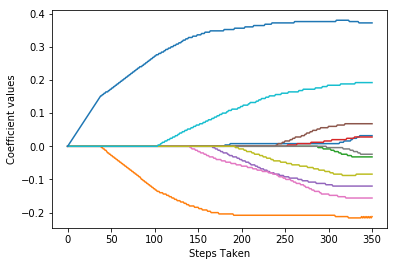

In [12]:
nzList=[]
nzbeta= [index for index in range(ncols) if beta[index] !=0.0]
for q in nzbeta:
    if (q in nzList)==False:
        nzList.append(q)
nameList=[names[nzList[i]] for i in range(len(nzList))]
print(nameList)
nPts= len(betaMat)
for i in range(ncols):
    coefCurve= [betaMat[k][i] for k in range(nPts)]
    xaxis=range(nPts)
    plot.plot(xaxis,coefCurve)
plot.xlabel("Steps Taken")
plot.ylabel(("Coefficient values"))
plot.show()

Minimun Mean Square error 0.828100868137
Index of Minimum Mean Square Error 336


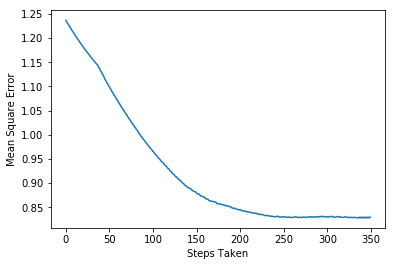

In [16]:
cvCurve=[]
for errVect in errors:
    mse=sum([x*x for x in errVect])/len(errVect)
    cvCurve.append(mse)
minMse=min(cvCurve)
minPt=[i for i in range(len(cvCurve)) if cvCurve[i]==minMse][0]
print("Minimun Mean Square error", minMse)
print("Index of Minimum Mean Square Error",minPt)

xaxis=range(len(cvCurve))
plot.plot(xaxis,cvCurve)

plot.xlabel("Steps Taken")
plot.ylabel(("Mean Square Error"))
plot.show()